In [10]:
# Test to see if filament CLASS works well 
# Test to see if functions work well how they currently are (28 June 2024)
import sys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = '../filaments/'
sys.path.insert(0, path)
import filament_functions as ff
from filament import Filament

In [2]:
# Sample path to GAMA filaments 
skel_path = '../Sample_Filaments/GAMA_tess.NDnet_s5.up.NDskl.S002.BRK.ASMB.rmO.rmB.a.NDskl'
my_filaments = Filament(skel_path)
myfils = my_filaments.import_fils()

header1, ANDSKEL

ndims, 3

Comments, #No comments (RB) (RB) (RB) (RB) (RB)

Bounding box, BBOX [-1436.7,-987.426,-78.1993] [1440.62,2098.18,156.865]

ncrit, 3588
nfils, 3679
Reading data fields:
CP field: persistence_ratio

CP field: persistence_nsigmas

CP field: persistence

CP field: robustness_ratio

CP field: robustness

CP field: persistence_pair

CP field: parent_index

CP field: parent_log_index

CP field: log_field_value

CP field: field_value

CP field: cell

Filament field: field_value

Filament field: orientation

Filament field: cell

Filament field: log_field_value

Filament field: type

Filament field: robustness

Filament field: robustness_ratio

Reading filaments took 0.05 secs.
header1, ANDSKEL

ndims, 3

Comments, #No comments (RB) (RB) (RB) (RB) (RB)

Bounding box, BBOX [-1436.7,-987.426,-78.1993] [1440.62,2098.18,156.865]

ncrit, 3588
nfils, 3679
Reading data fields:
CP field: persistence_ratio

CP field: persistence_nsigmas

CP field: persistence

CP field: robus

In [4]:
# Get filament segments to begin with
segments = my_filaments.segment_coordinates()

In [5]:
segments

,px,py,pz,px2,py2,pz2,Filament ID
0,-218.108,-153.104,5.52731,-214.830,-150.358,8.16807,0
1,-214.830,-150.358,8.16807,-212.155,-147.191,9.33830,0
2,-212.155,-147.191,9.33830,-210.049,-144.316,9.33611,0
3,-210.049,-144.316,9.33611,-208.257,-142.392,9.13846,0
4,-208.257,-142.392,9.13846,-206.576,-141.051,9.01675,0
...,...,...,...,...,...,...,...
2,-824.080,-770.452,-5.33363,-822.003,-772.237,-6.29777,3677
0,-823.801,-728.619,-29.48720,-823.578,-728.600,-32.58120,3678
1,-823.578,-728.600,-32.58120,-822.746,-728.210,-34.12370,3678
2,-822.746,-728.210,-34.12370,-821.686,-727.488,-34.64460,3678


### GET LENGTHS

In [10]:
# For ease/speed we convert to Numpy arrays 
segment_array = np.array(segments)
segment_array

array([[-218.108  , -153.104  ,    5.52731, ..., -150.358  ,    8.16807,
           0.     ],
       [-214.83   , -150.358  ,    8.16807, ..., -147.191  ,    9.3383 ,
           0.     ],
       [-212.155  , -147.191  ,    9.3383 , ..., -144.316  ,    9.33611,
           0.     ],
       ...,
       [-823.578  , -728.6    ,  -32.5812 , ..., -728.21   ,  -34.1237 ,
        3678.     ],
       [-822.746  , -728.21   ,  -34.1237 , ..., -727.488  ,  -34.6446 ,
        3678.     ],
       [-821.686  , -727.488  ,  -34.6446 , ..., -726.648  ,  -34.944  ,
        3678.     ]])

In [11]:
# One "row" of this array has all the columns from the DataFrame earlier
segment_array[0]

array([-218.108  , -153.104  ,    5.52731, -214.83   , -150.358  ,
          8.16807,    0.     ])

In [12]:
segment_array[0][:3] #px py pz

array([-218.108  , -153.104  ,    5.52731])

In [13]:
segment_array[0][3:-1] #px2, py2, pz2

array([-214.83   , -150.358  ,    8.16807])

In [15]:
segment_array[1][-1] #filament ID

0.0

In [29]:
# Now calculate the distance between segments for each Filament ID; note that no ID is stored 
N = len(segment_array)
segment_distances = np.zeros(N)

for i in range(N):
    segment_distances[i] = np.linalg.norm((segment_array[i][:3]) - (segment_array[i][3:-1]))

segment_distances

array([5.02587439, 4.30754597, 3.56382741, ..., 1.79544709, 1.38427628,
       1.44578157])

In [30]:
# Check how many unique Filament ID's there are
filament_ids = np.array(segments["Filament ID"])
unique_ids = np.unique(filament_ids)
unique_ids.shape

(3679,)

In [31]:
# now we have array of ONE value for distance between segements
# and an array of equal size for the filament IDs 
filament_ids.shape

(25060,)

In [32]:
# ID mask tells us all the places where filament ID's are equal to 0 in the filament_ids array
ID_mask = np.where(filament_ids==0)
ID_mask # voila! 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),)

In [33]:
# Therefore this line gives us all the distances between segments for the first (0-th ID) Filament ! All we need now is to sum t
segment_distances[ID_mask]

array([5.02587439, 4.30754597, 3.56382741, 2.63668457, 2.15380021,
       2.12433768, 2.01336656, 1.64658885, 1.20561454, 0.8846086 ,
       0.64547211, 0.56726631, 0.73550244, 0.84330224, 0.68233929,
       0.45055999, 0.60296725, 0.71837495, 0.68231875, 0.61884197,
       0.64767391, 0.89475577, 1.09027453, 0.96598282, 0.77195839,
       0.66882677, 0.58283834, 0.6762714 , 0.72729872, 0.70018356])

In [34]:
# Sum these distances to get length of Filament with ID 0
np.sum(segment_distances[ID_mask])

39.835258262064606

In [35]:
# Next loop over the unique Filament IDs and sum distances between segments for each Filament ID
M = len(unique_ids) # length of unique ids, from 0 to 7340

filament_lengths = np.zeros(M)

for i in range(M): 
    ID_mask = np.where(filament_ids == i)  # masks entire filament length array by filament ID (which should == iterator step)
    filament_lengths[i] = np.sum(segment_distances[ID_mask]) # sums all of the non-masked values from iterator check, saves to i-th value of new array
    
filament_lengths

array([39.83525826, 19.41085909, 17.66642879, ..., 28.89221023,
        7.72567898,  7.72758908])

In [36]:
#filament lengths should match shape of unique id
print(filament_lengths.shape, "\n", unique_ids.shape) # voila

(3679,) 
 (3679,)


(array([1.074e+03, 9.750e+02, 6.220e+02, 3.830e+02, 2.190e+02, 1.500e+02,
        9.300e+01, 4.300e+01, 2.600e+01, 2.700e+01, 2.100e+01, 1.300e+01,
        9.000e+00, 5.000e+00, 7.000e+00, 4.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([6.18165105e-03, 7.64146585e+00, 1.52767500e+01, 2.29120342e+01,
        3.05473184e+01, 3.81826026e+01, 4.58178868e+01, 5.34531710e+01,
        6.10884552e+01, 6.87237394e+01, 7.63590236e+01, 8.39943078e+01,
        9.16295920e+01, 9.92648762e+01, 1.06900160e+02, 1.14535445e+02,
        1.22170729e+02, 1.29806013e+02, 1.37441297e+02, 1.45076581e+02,
        1.52711866e+02, 1.60347150e+02, 1.67982434e+02, 1.75617718e+02,
        1.83253002e+02, 1.90888287e+02, 1.98523571e+02, 2.06158855e+02,
        2.13794139e+02, 2.21429423e+02, 2.29064708e+02]),
 <BarContainer object of 30 artists>)

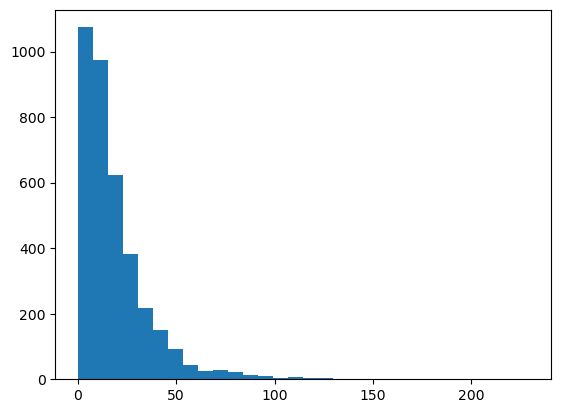

In [40]:
plt.hist(filament_lengths, bins=30)

### Save Filament Lengths

In [41]:
M = len(filament_ids) # larger array 
N = len(filament_lengths) # smaller array 

all_filament_lengths = np.zeros(M)

for i in range(N): 
    mask2 = np.where(filament_ids == i)
    all_filament_lengths[mask2] = filament_lengths[i]

all_filament_lengths

array([39.83525826, 39.83525826, 39.83525826, ...,  7.72758908,
        7.72758908,  7.72758908])

In [44]:
# Confirm this matches the original segment of filaments array
print(all_filament_lengths.shape, "\n", segment_array.shape)

(25060,) 
 (25060, 7)


In [45]:
# Add columnn to DataFrame
segments['Filament Length'] = all_filament_lengths
segments 

,px,py,pz,px2,py2,pz2,Filament ID,Filament Length
0,-218.108,-153.104,5.52731,-214.830,-150.358,8.16807,0,39.835258
1,-214.830,-150.358,8.16807,-212.155,-147.191,9.33830,0,39.835258
2,-212.155,-147.191,9.33830,-210.049,-144.316,9.33611,0,39.835258
3,-210.049,-144.316,9.33611,-208.257,-142.392,9.13846,0,39.835258
4,-208.257,-142.392,9.13846,-206.576,-141.051,9.01675,0,39.835258
...,...,...,...,...,...,...,...,...
2,-824.080,-770.452,-5.33363,-822.003,-772.237,-6.29777,3677,7.725679
0,-823.801,-728.619,-29.48720,-823.578,-728.600,-32.58120,3678,7.727589
1,-823.578,-728.600,-32.58120,-822.746,-728.210,-34.12370,3678,7.727589
2,-822.746,-728.210,-34.12370,-821.686,-727.488,-34.64460,3678,7.727589


### CLASS CHECK BELOW

In [5]:
my_filaments.lengths()

,px,py,pz,px2,py2,pz2,Filament ID,Filament Length
0,-218.108,-153.104,5.52731,-214.830,-150.358,8.16807,0,39.835258
1,-214.830,-150.358,8.16807,-212.155,-147.191,9.33830,0,39.835258
2,-212.155,-147.191,9.33830,-210.049,-144.316,9.33611,0,39.835258
3,-210.049,-144.316,9.33611,-208.257,-142.392,9.13846,0,39.835258
4,-208.257,-142.392,9.13846,-206.576,-141.051,9.01675,0,39.835258
...,...,...,...,...,...,...,...,...
2,-824.080,-770.452,-5.33363,-822.003,-772.237,-6.29777,3677,7.725679
0,-823.801,-728.619,-29.48720,-823.578,-728.600,-32.58120,3678,7.727589
1,-823.578,-728.600,-32.58120,-822.746,-728.210,-34.12370,3678,7.727589
2,-822.746,-728.210,-34.12370,-821.686,-727.488,-34.64460,3678,7.727589


In [8]:
my_filaments.lengths(DataFrame=False)

array([39.83525826, 19.41085909, 17.66642879, ..., 28.89221023,
        7.72567898,  7.72758908])

In [9]:
my_filaments.lengths(DataFrame=False).shape

(3679,)